In [1]:
from fastai import *

In [2]:
from fastai.vision import *
from fastai.widgets import *

In [3]:
ds_path = '/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes'

In [6]:
# create a databunch from the images; no validation images
db = (ImageList.from_folder(ds_path).split_none()
                   .label_from_folder().transform(size=224)
                   .databunch())
len(db.train_ds)

6941

In [7]:
# define a cnn
learn = cnn_learner(db, models.resnet50, metrics=error_rate)

In [8]:
# detect similar images
ds, idxs = DatasetFormatter().from_similars(learn, layer_ls=[0,7,1], pool=None)

Getting activations...


Computing similarities...


## view the duplicates

/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_mirror_selfie__confirmed_224x224/google_medium_close_up_photo_091218_000110.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_selfie__confirmed_224x224/google_medium_close_up__091218_000164.jpg


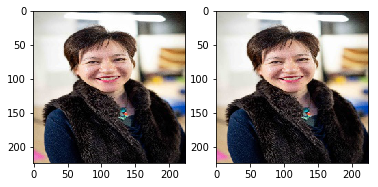

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_mirror_selfie__confirmed_224x224/google_medium_close_up_photo_091218_000110.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_selfie__confirmed_224x224/google_medium_close_up_face_091218_000040.jpg


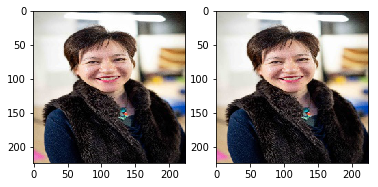

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_selfie__confirmed_224x224/google_medium_close_up__091218_000164.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_selfie__confirmed_224x224/google_medium_close_up_face_091218_000040.jpg


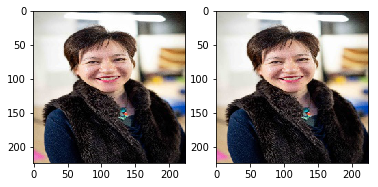

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie__091218_000581.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie_photo_091218_000558.jpg


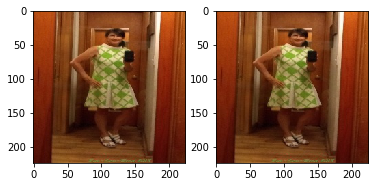

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_mirror_selfie__confirmed_224x224/32896748611_1f1c6023ee_c.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/non_mirror_selfie__confirmed_224x224/portrait_tag_32896748611_1f1c6023ee_c.jpg


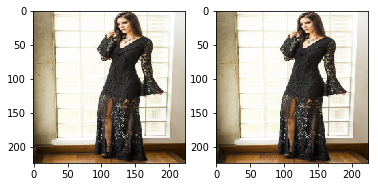

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie_photo_091218_000026.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie__091218_000025.jpg


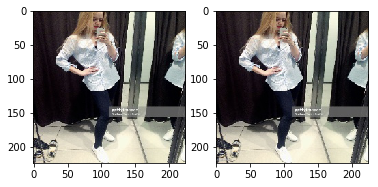

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/bing_mirror_selfie_pastmonth_000041.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/bing_mirror_selfie_pastyear_000114.jpg


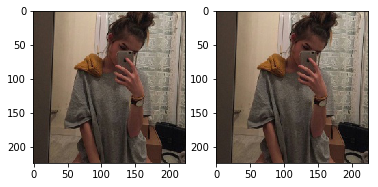

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/bing_mirror_selfie_pastmonth_000034.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/bing_mirror_selfie_pastyear_000007.jpg


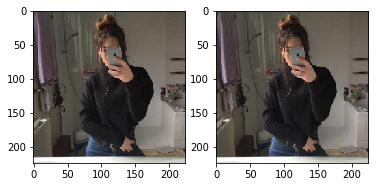

Press Enter to continue... 


/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie_photo_091218_000565.jpg
/disks/data/paper_projects/selfie_detection/data/DS_July22/data_4classes/mirror_selfie__confirmed_224x224/google_mirror_selfie__091218_000579.jpg


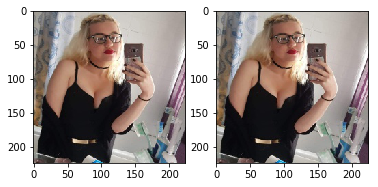

KeyboardInterrupt: 

In [9]:
from matplotlib import pyplot as plt

# view the duplicate images
for i in range(0, len(idxs), 2):
    
    path1 = ds.x.items[idxs[i]]
    path2 = ds.x.items[idxs[i+1]]
    im1 = plt.imread(path1)
    im2 = plt.imread(path2)
    plt.Figure(figsize=(40,15))
    plt.subplot(121)
    plt.imshow(im1)
    print(path1)    
    plt.subplot(122)
    plt.imshow(im2)
    print(path2)
    plt.show()
    input("Press Enter to continue...")
    

    

## move duplicates to another folder keeping class structure intact

In [10]:
import os

# moves the duplicates in a directory parallel to the image class folders in the dataset directory

last_dir_ds_path = ds_path[ds_path.rfind('/')+1:]
trash_path = 'duplicates'

[os.makedirs(ds_path.replace(last_dir_ds_path, last_dir_ds_path+'/'+trash_path+'/'+im_class), exist_ok= True) for im_class in ds.classes]

dups = list(set([ds.x.items[idxs[i]] for i in range(0, len(idxs),2)]))


for fname in dups:
    os.rename(str(fname), str(fname).replace(last_dir_ds_path+'/', last_dir_ds_path+'/'+trash_path+'/'))    
    

In [15]:
# ImageCleaner(ds, idxs, ds_path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [75]:
[print(im_class) for im_class in ds.classes]

non_selfie__confirmed
selfie__confirmed


[None, None]

'/DS_merged'

In [95]:
DatasetFormatter??

Init signature: DatasetFormatter()
Source:        
class DatasetFormatter():
    "Returns a dataset with the appropriate format and file indices to be displayed."
    @classmethod
    def from_toplosses(cls, learn, n_imgs=None, **kwargs):
        "Gets indices with top losses."
        train_ds, train_idxs = cls.get_toplosses_idxs(learn, n_imgs, **kwargs)
        return train_ds, train_idxs

    @classmethod
    def get_toplosses_idxs(cls, learn, n_imgs, **kwargs):
        "Sorts `ds_type` dataset by top losses and returns dataset and sorted indices."
        dl = learn.data.fix_dl
        if not n_imgs: n_imgs = len(dl.dataset)
        _,_,top_losses = learn.get_preds(ds_type=DatasetType.Fix, with_loss=True)
        idxs = torch.topk(top_losses, n_imgs)[1]
        return cls.padded_ds(dl.dataset, **kwargs), idxs

    def padded_ds(ll_input, size=(250, 300), resize_method=ResizeMethod.CROP, padding_mode='zeros', **kwargs):
        "For a LabelList `ll_input`, resize each image to `size